## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("./ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

In [4]:
total_row = df.shape[0]

c. The number of unique users in the dataset.

In [5]:
df['user_id'].nunique()

290584

In [6]:
number_user = df['user_id'].nunique()

d. The proportion of users converted.

In [7]:
df[df['converted']== 1].count()[0] / total_row

0.11965919355605512

In [8]:
df[df['converted'] == 1].count()[0] / number_user

0.12126269856564711

d2. How many user converted twice

In [9]:
(df.groupby(['user_id'])['converted'].sum() > 1).sum()

64

e. The number of times the `new_page` and `treatment` don't match.

In [10]:
# Check for entries with new_page and control group
df.query("landing_page == 'new_page' and group != 'treatment'").count()[0]

1928

In [11]:
missmatch = df.query(" landing_page == 'new_page' and group != 'treatment'").count()[0]

In [12]:
# Check for entries with old_page and treatment group
df.query("landing_page != 'new_page' and group == 'treatment'").count()[0]

1965

In [13]:
missmatch_2 = df.query(" landing_page != 'new_page' and group == 'treatment'").count()[0]

In [14]:
missmatch + missmatch_2

3893

In [15]:
# locate missmatches (new_page/control & old_page/treatment) and concat both frames
mm_df1 = df.loc[(df['landing_page'] == 'new_page') & (df['group'] != 'treatment')]
mm_df2 = df.loc[(df['landing_page'] != 'new_page') & (df['group'] == 'treatment')]
mm_total_df = pd.concat([mm_df1,mm_df2])

f. Do any of the rows have missing values?

In [16]:
df.isna().sum().sum()

0

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [17]:
## one way with the missmatch dataframe
df2 = df[~df.isin(mm_total_df)].dropna()

## another way with piping
#df2 = df[((df['group'] == 'treatment') & (df['landing_page'] == 'new_page'))
#         |
  #       ((df['group'] == 'control') & (df['landing_page'] == 'old_page'))      
  #      ]

In [18]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       290585 non-null  float64
 1   timestamp     290585 non-null  object 
 2   group         290585 non-null  object 
 3   landing_page  290585 non-null  object 
 4   converted     290585 non-null  float64
dtypes: float64(2), object(3)
memory usage: 13.3+ MB


a. How many unique **user_id**s are in **df2**?

In [20]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [21]:
df2[df2.duplicated(['user_id'],keep=False)]['user_id']

1899    773192.0
2893    773192.0
Name: user_id, dtype: float64

c. What is the row information for the repeat **user_id**? 

In [22]:
df2[df2.duplicated(['user_id'],keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192.0,2017-01-09 05:37:58.781806,treatment,new_page,0.0
2893,773192.0,2017-01-14 02:55:59.590927,treatment,new_page,0.0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [23]:
# Dropping Duplicates, in this case keep the last of entry of the user
df2.drop_duplicates(subset='user_id',keep='last', inplace=True)

In [24]:
# Checking dataframe infos
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       290584 non-null  float64
 1   timestamp     290584 non-null  object 
 2   group         290584 non-null  object 
 3   landing_page  290584 non-null  object 
 4   converted     290584 non-null  float64
dtypes: float64(2), object(3)
memory usage: 13.3+ MB


In [25]:
new_total = df2.shape[0]
total_control = df2[df2['group']=='control'].count()[0]
total_treat = df2[df2['group']=='treatment'].count()[0]

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [26]:
df2[df2['converted'] == True].count()[0] / new_total

0.11959708724499628

In [27]:
# faster way to perform the same result
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [28]:
df2.query("group =='control' and converted == True").count()[0] / total_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [29]:
df2.query("group =='treatment' and converted == True").count()[0] / total_treat

0.11880806551510564

d. What is the probability that an individual received the new page?

In [30]:
df2[df2['landing_page']=='new_page'].count()[0] / new_total

0.5000619442226688

In [31]:
df2[df2['landing_page']=='new_page'].count()[0]

145310

In [32]:
# Checking Testingperiod
df2['timestamp'] = pd.to_datetime(df2.timestamp)
df2.timestamp.max() - df2.timestamp.min()

Timedelta('21 days 23:59:49.081927')

In [33]:
df2.query("landing_page == 'new_page'").timestamp.max(), df2.query("landing_page == 'new_page'").timestamp.min()

(Timestamp('2017-01-24 13:41:44.097174'),
 Timestamp('2017-01-02 13:42:05.378582'))

In [34]:
df2.query("landing_page == 'old_page'").timestamp.max(), df2.query("landing_page == 'old_page'").timestamp.min()

(Timestamp('2017-01-24 13:41:54.460509'),
 Timestamp('2017-01-02 13:42:15.234051'))

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

Answer:

The Test ran for 22 days and tracked the data of 290584 relevant/unique users. 50,0% of the probands got the new_page/treatment, in total 145310 users.

Considering the given data there is no sufficient evidence that the new treatment page leads to more conversions. The conversionrates or probabilities that an individual converted in their group is nearly the same, round about 12%. The conversionrate for the new page is sligthly worse than the rate of the old page by 0,15%.

One important question is how many users were old or new customers. Change aversions can have a relevant impact on the results. Furthormore the timeperiod could be to short for a statistical evaluation but with the given data there is no reason to launch the new page. It's possible that new page can lead to a greater gain of the conversionrate when the impact of the change Aversions decreases over time.

A Hypothesis test can help to decide if the company should launch the new page or not.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Answer:

**$H_{0}$** : **$p_{old}$** $\geq$ **$p_{new}$**
 
 **$H_{1}$** : **$p_{old}$** $<$ **$p_{new}$**
 
 with $\alpha = 0.05$ 
 
 in this case it would be better to compare the differences
 
**$H_{0}$** : **$0$** $\geq$ **$p_{new}$** - **$p_{old}$**

**$H_{1}$** : **$0$** $<$ **$p_{new}$** - **$p_{old}$**

**Put your answer here.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

 **$p_{real-conv}$** $=$ **$p_{old}$** $=$ **$p_{new}$**
 

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [35]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [36]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [37]:
n_new = df2[df2['group']== 'treatment'].count()[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [38]:
n_old = df2[df2['group']== 'control'].count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [39]:
np.random.seed(42)

In [40]:
n_choice_new = np.random.choice([1,0],size=n_new, p=[p_new, 1-p_new])
n_choice_new

array([0, 0, 0, ..., 0, 1, 0])

In [41]:
p_new_sim = n_choice_new.mean()

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [42]:
n_choice_old = np.random.choice([1,0],size=n_old, p=[p_old, 1-p_old])
n_choice_old

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
p_old_sim = n_choice_old.mean()

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [44]:
p_new_sim - p_old_sim

0.0005416487598274428

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [45]:
# is it possible to use scipys binomial function with 10.000 Tests?

p_diffs = []

for _ in range(10000):
    p_new_sim = np.random.choice([1,0],size=n_new, p=[p_new, 1-p_new]).mean()
    p_old_sim = np.random.choice([1,0],size=n_old, p=[p_old, 1-p_old]).mean()
    p_diffs.append(p_new_sim - p_old_sim)

P_diffs = np.array(p_diffs) # Problems with "> operator with lists" in the task below by checking the p value

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

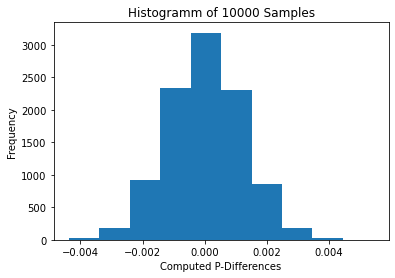

In [46]:
plt.hist(p_diffs);
plt.xlabel('Computed P-Differences')
plt.ylabel('Frequency')
plt.title('Histogramm of 10000 Samples');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [47]:
old_conv_mean = df2[df2['group'] == 'control'].converted.mean()
new_conv_mean = df2[df2['group'] == 'treatment'].converted.mean()
obs_diff = new_conv_mean - old_conv_mean
(P_diffs > obs_diff).mean()

0.9065

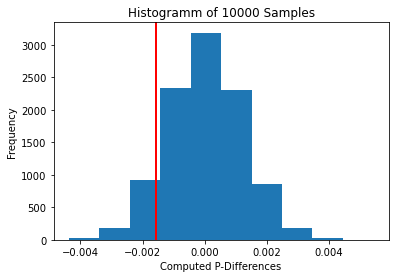

In [48]:
# Plotting the Histogramm again with the observed Diff
plt.hist(p_diffs);
plt.axvline(x=obs_diff, color='r', linewidth=2);
plt.xlabel('Computed P-Differences')
plt.ylabel('Frequency')
plt.title('Histogramm of 10000 Samples');

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Answer:

First we bootstrapped our data (10.000 Simualtion). With the operation what proportion of p_diff are greater than the actual difference we compute the p value. The p value is a statistical value which can tell us how possible it is to get the observed difference if the nullhypothesis is true. In this case the p-value is 90%, so the possibilty is really high to get the obeserved difference in our sampling distribution. Our conlcusion is with a given type 1 error rate of 5% (p-value > alpha): We fail to reject then null hypothesis, so we have no evidence to reject the null hypothesis. The posibility is high that new page is NOT better than the old page, we have no evidence to recommend the design of the new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [49]:
from statsmodels.stats.proportion import proportions_ztest

convert_old = df2[df2['group'] == 'control'].converted.sum()
convert_new = df2[df2['group'] == 'treatment'].converted.sum()
n_old = df2[df2['landing_page'] == 'old_page'].count()[0]
n_new = df2[df2['landing_page'] == 'new_page'].count()[0]

In [50]:
convert_old, convert_new, n_old, n_new

(17489.0, 17264.0, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [51]:
zstat, p_val = proportions_ztest(count=[convert_new, convert_old], nobs=[n_new, n_old], value=0, alternative='larger')

In [52]:
zstat, p_val

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Answer:

The z test assumes that the data is normally distributed. In this case we compute a onesided z test with two samples. The p value is nearly the same and tells us the same findings in part k. 

The Z Score is an additional measurement and tells us how "far" our observed data/difference is from the mean(in this case we assume that there is no difference "mean=0"). In our case the z-score is -1,31. A negative Z score tells us, that our observed data is below the assumed mean. Compared to the histogramm above that shows the same finding, the red vertical line is on the leftside of our curve). The number tells us how many standard deviation the observed data from the population mean is.

In [53]:
# Mutliply the z score with standard deviation and compare with the observed difference(should be the same)
# we re not using exactly the right deviation in this computation, this should only show the meaning of the z score.
zstat * np.std(p_diffs), obs_diff

(-0.0015796438248592704, -0.0015782389853555567)

![zscore](https://desktop.arcgis.com/de/arcmap/10.5/tools/spatial-statistics-toolbox/GUID-CBF63B74-D1B2-44FC-A316-7AC2B1C1D464-web.png)

The diagramm above shows us the critical z value associated with significance level we set. With our Null and alternative Hypothesis we perform a onesided test and we wanted to prove if the new page is better than the old one. To prove if our observed data shows a significant result the z score has to be positive with value of 1.96(with a alpha=0.05). In our case our z-score is -1.31 and far away from 1.96. The results are the same, there is no evidence to reject the Nullhypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Answer:

In this case with a categorical response with two possible outcomes (conversion, no conversion) a logistic regression model should be preferred.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [54]:
import statsmodels.api as sm
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104.0,2017-01-21 22:11:48.556739,control,old_page,0.0
1,804228.0,2017-01-12 08:01:45.159739,control,old_page,0.0
2,661590.0,2017-01-11 16:55:06.154213,treatment,new_page,0.0
3,853541.0,2017-01-08 18:28:03.143765,treatment,new_page,0.0
4,864975.0,2017-01-21 01:52:26.210827,control,old_page,1.0


In [55]:
# creating an intercept for the regression
df2['intercept']= 1

In [56]:
# creating dummy variables for the group column
df_dummy = pd.get_dummies(df2['group'])
df_dummy.rename(columns={'treatment' : 'ab_page'}, inplace=True)
reg_df = df2.join(df_dummy['ab_page'])

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [57]:
#fitting the logistic regression
logit_mod = sm.Logit(reg_df['converted'], reg_df[['intercept', 'ab_page']])
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [58]:
# checking regression summary
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Apr 2021   Pseudo R-squ.:               8.077e-06
Time:                        11:50:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [59]:
# exponentiate the coef
np.exp(logit_res.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [60]:
# computing the reciprocal
1/np.exp(logit_res.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

*e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

Answer:

**$H_{0}$** : **$0$** $=$ **$p_{new}$** - **$p_{old}$**

**$H_{1}$** : **$0$** $\neg$ **$p_{new}$** - **$p_{old}$**

The assumption of the regression model is that there is no difference between the treatment and control group(H0). The alternative is that there is A difference between the two groups. In the second part we tried to prove if the new page is better than the old page. That are two different cases. In the second part we performed a onesided test.

The associated p value with ab_page is 0.19.

*f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?*

Answer:

The given Dataframe includes the Timestamps of each user which can be helpful to look for conversion rates seperated in different timeperiods(e.g. weekday, weekend) to get a better insight of the given data. But for a comparison of the new and old page it could be better to get more information about the individual(e.g. is the user a completely new customer or did he know the old page? How old are the customers? Where are they from? What's their job?)

A logistic regression model compared to a linear model is usually more complex und more difficult to interpret(for example the coefficients). By adding more additional terms to regression models it's difficult the intepret the results and make the right prediction/descision. Another disadvantage is that we have to care about correlation between the predictor variables which can be lead to false results.

*g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

*Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns -  Provide the statistical output as well as a written response to answer this question.*

In [61]:
# reading the data and check first rows
df_country = pd.read_csv('./countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [62]:
# merging both Frames on user_id
df3 = pd.merge(reg_df, df_country, on='user_id')
df3.head(20)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104.0,2017-01-21 22:11:48.556739,control,old_page,0.0,1,0,US
1,804228.0,2017-01-12 08:01:45.159739,control,old_page,0.0,1,0,US
2,661590.0,2017-01-11 16:55:06.154213,treatment,new_page,0.0,1,1,US
3,853541.0,2017-01-08 18:28:03.143765,treatment,new_page,0.0,1,1,US
4,864975.0,2017-01-21 01:52:26.210827,control,old_page,1.0,1,0,US
5,936923.0,2017-01-10 15:20:49.083499,control,old_page,0.0,1,0,US
6,679687.0,2017-01-19 03:26:46.940749,treatment,new_page,1.0,1,1,CA
7,719014.0,2017-01-17 01:48:29.539573,control,old_page,0.0,1,0,US
8,817355.0,2017-01-04 17:58:08.979471,treatment,new_page,1.0,1,1,UK
9,839785.0,2017-01-15 18:11:06.610965,treatment,new_page,1.0,1,1,CA


In [63]:
# checking which countries are listed
df3['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [64]:
# creating dummy Frames for country and joining it to the previous frame
dummy_df_country = pd.get_dummies(df3['country'])
df3 = df3.join(dummy_df_country)

In [65]:
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104.0,2017-01-21 22:11:48.556739,control,old_page,0.0,1,0,US,0,0,1
1,804228.0,2017-01-12 08:01:45.159739,control,old_page,0.0,1,0,US,0,0,1
2,661590.0,2017-01-11 16:55:06.154213,treatment,new_page,0.0,1,1,US,0,0,1
3,853541.0,2017-01-08 18:28:03.143765,treatment,new_page,0.0,1,1,US,0,0,1
4,864975.0,2017-01-21 01:52:26.210827,control,old_page,1.0,1,0,US,0,0,1


In [66]:
# Creating and fitting the logistic regression for country 
logit_mod_country = sm.Logit(df3['converted'], df3[['intercept', 'UK', 'US']])
logit_res_country = logit_mod_country.fit()
logit_res_country.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 10 Apr 2021   Pseudo R-squ.:               1.521e-05
Time:                        11:50:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [67]:
#
np.exp(logit_res_country.params)

intercept    0.130350
UK           1.052027
US           1.041647
dtype: float64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.

Provide the summary results, and your conclusions based on the results.

In [68]:
# add new columns for the interaction between page and country
df3['CA_ab_page'] = df3['CA'] * df3['ab_page']
df3['UK_ab_page'] = df3['UK'] * df3['ab_page']
df3['US_ab_page'] = df3['US'] * df3['ab_page']

In [69]:
# creating the new logit model with the interaction between pages and countries
logit_country_page = sm.Logit(df3['converted'], df3[['intercept', 'UK_ab_page', 'US_ab_page']])
res_country_page = logit_country_page.fit()
res_country_page.summary()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 10 Apr 2021   Pseudo R-squ.:               1.082e-05
Time:                        11:50:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.3164
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9926      0.008   -252.910      0.000      -2.008      -1.977
UK_ab_page     0.0112      0.018      0.626      0.532      -0.024       0.046
US_ab_page    -0.0144      0.012     -1.155      0.248      -0.039       0.010
==============================================================================
"""

In [70]:
#
np.exp(res_country_page.params)

intercept     0.136338
UK_ab_page    1.011292
US_ab_page    0.985679
dtype: float64

#### Result Regression ####

In all regression models none of the predictor variables (treatment, countries and treatment x countries) show a statistically significance in predicting if someone converts or not. All p-values are greater than 5%, so we failed to reject the null hypothesis.

Even there is no statisical significance, here is a short summary of the 3 models.

First logistic Model:
Conversions to ab page(treatment). Controlgroup as baseline.
Conversions are 1.015 times as likely on the old page than on the new payge holding all else constant

Second Model:
Conversions to countries. CA as baseline.
Conversions in UK are 1.05 times more likely than in CA(baseline) holding all else constant
Conversions in US are 1.04 times more likely than in CA(baseline) holding all else constant

Third Model:
Conversions to interaction between countries and treatment. CA & treatment as baseline
Conversions are 1.01 times more likely in the UK "with the new page" than in CA with new page(baseline) holding all else constant
Conversions are 0.99 times more likely in the US "with the new page" than in CA with new page(baseline) holding all else constant



# Conclusion

In all parts we failed to reject the null hypothesis. We don't have any evidence that the new page of the company could be better than the old page.
I recommend three options for the company:
In expectation that the decrease of the change aversion would change a lot over time.

1. If the company want to use the new page, collect more data about the customer like age, workplace, if he is a old customer or a new one and make quick feedback survey. This can provide a better insight.

2. Create a completely new page and collect the data like in 1.. But first make a survey what the customers want and collect data of the User flow(CTR of the pages)

3. Stay with the old page and save the money

In [71]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

1